# **Case Study on Regression**

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data=pd.read_csv('car_age_price.csv') ##Loading dataset

In [16]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [17]:
data.tail()

,Year,Price
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000
111,2015,425000


In [48]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


##Checking for null values 

In [49]:
data.isna().sum() 

Year     0
Price    0
dtype: int64

##Since there are no null values we can now check for the correlation

##Checking for correlation

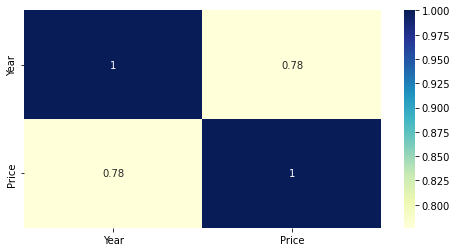

In [50]:
corrmatrix = data.corr()
plt.subplots(figsize=(8,4))
sns.heatmap(corrmatrix, annot=True, cmap='YlGnBu')

In [51]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [52]:
y=data['Price']
X=data.drop(['Price'],axis=1)

In [53]:
from sklearn.model_selection import train_test_split

##Splitting the data into testing and training data

In [54]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression ##Import the Line Regressor

In [56]:
lr = LinearRegression()
model1 = lr.fit(X_train, y_train)
predictions = model1.predict(X_test)

In [57]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [58]:
predictions

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

##The possible price of a second hand i 20 in 2022 will be between 4 and 7 lakhs

In [59]:
from sklearn.metrics import mean_squared_error,r2_score

##Checking the model performance with mean square and R square error

In [62]:
print('Mean Squared Error Is:',mean_squared_error(y_test,predictions))
print('R Squared Error Is:',r2_score(y_test,predictions))

Mean Squared Error Is: 4326906256.829671
R Squared Error Is: 0.36759313425902185


In [65]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.25,random_state=42)
lr = LinearRegression()
model2 = lr.fit(X_train, y_train)
predictions = model2.predict(X_test)
print('Mean Squared Error Is:',mean_squared_error(y_test,predictions))
print('R Squared Error Is:',r2_score(y_test,predictions))

Mean Squared Error Is: 3878767151.073449
R Squared Error Is: 0.4347961632108023


**##Prediction using Lasso Regression**

In [76]:
X = data.iloc[:, :-1].values
y= data.iloc[:, 1].values
      

##Splitting data into training and testing data

In [77]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.25,random_state=42)


##Importing the lasso regressor

In [78]:
from sklearn.linear_model import Lasso


In [81]:
lasso_reg = Lasso(normalize=True)

model3=lasso_reg.fit(X_train,y_train)
predictions=model3.predict(X_test)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [82]:
y_test

array([525000, 495000, 465000, 450000, 550000, 300000, 550000, 500000,
       500000, 550000, 320000, 550000, 465000, 640000, 465000, 500000,
       345000, 390000, 375000, 520000, 550000, 500000, 550000, 525000,
       520000, 540000, 434999, 320000])

In [83]:
predictions

array([599209.07858668, 505262.62931298, 552235.85394983, 552235.85394983,
       552235.85394983, 411316.18003929, 505262.62931298, 552235.85394983,
       599209.07858668, 599209.07858668, 317369.73076558, 505262.62931298,
       411316.18003929, 646182.30322354, 552235.85394983, 599209.07858668,
       317369.73076558, 411316.18003929, 505262.62931298, 505262.62931298,
       505262.62931298, 505262.62931298, 505262.62931298, 505262.62931298,
       505262.62931298, 505262.62931298, 411316.18003929, 411316.18003929])

In [84]:
print('Mean Squared Error Is:',mean_squared_error(y_test,predictions))
print('R Squared Error Is:',r2_score(y_test,predictions))

Mean Squared Error Is: 3878313871.1496053
R Squared Error Is: 0.4348622139795434


## *Lasso Regressor is performing better